In [1]:
from fABBA import loadData
from fABBA import JABBA

In [2]:
from xabba import XABBA
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from xabba import compress
from xabba import inv_compress

### Single time series

In [4]:
ts = np.array([np.sin(0.05*i) for i in range(1000)])  # original time series (Trigonometric sine series of 1000 points)

In [5]:
pieces = compress(ts, 0.5)
inv_ts = inv_compress(pieces, ts[0])

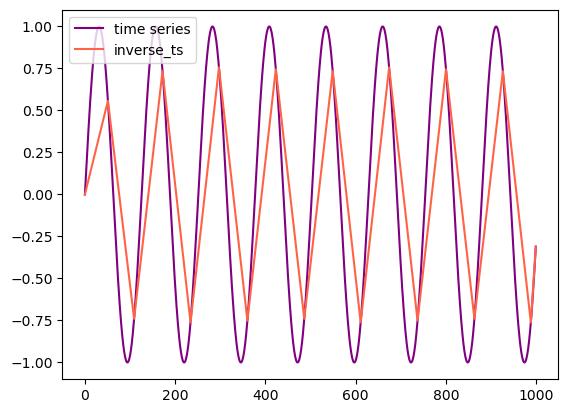

In [6]:
plt.plot(ts, label='time series', c='purple')
plt.plot(inv_ts, label='inverse_ts', c='tomato')
plt.legend()

In [7]:
ab = JABBA(tol=0.2, alpha=0.5, verbose=1)
string = ab.fit_transform(ts, n_jobs=1)
''.join(string[0])

Init 1 processors.
Generate 4 symbols


'aBbBbBbBbBbBbBbBA'

In [8]:
inv_ts1 = ab.inverse_transform(string)
string[0][1] = 'b'
inv_ts2 = ab.inverse_transform(string)

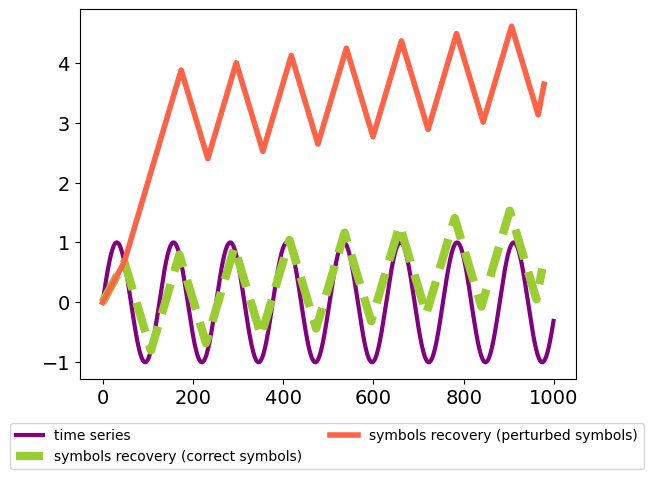

In [9]:
plt.plot(ts, label='time series', c='purple', linewidth=3)
plt.plot(inv_ts1, label='symbols recovery (correct symbols)', c='yellowgreen', linewidth=6, linestyle='--')
plt.plot(inv_ts2, label='symbols recovery (perturbed symbols)', c='tomato', linewidth=4, linestyle='-')
plt.legend(bbox_to_anchor=(1.15, -0.1), ncols=2)
plt.tick_params(axis='both', which='both', labelsize=14)
plt.savefig('save/ex1.pdf', bbox_inches='tight')
plt.show()

In [10]:
xab = XABBA(tol=0.2, alpha=0.5, bits_for_len=32, bits_for_inc=32, verbose=1)
string = xab.fit_transform(ts, n_jobs=1)
''.join(string[0])

Init 1 processors.
Generate 4 symbols


'abBbBbBbBbBbBbBbA'

In [11]:
xinv_ts1 = xab.inverse_transform(string)
string[0][1] = 'B'
xinv_ts2 = xab.inverse_transform(string)

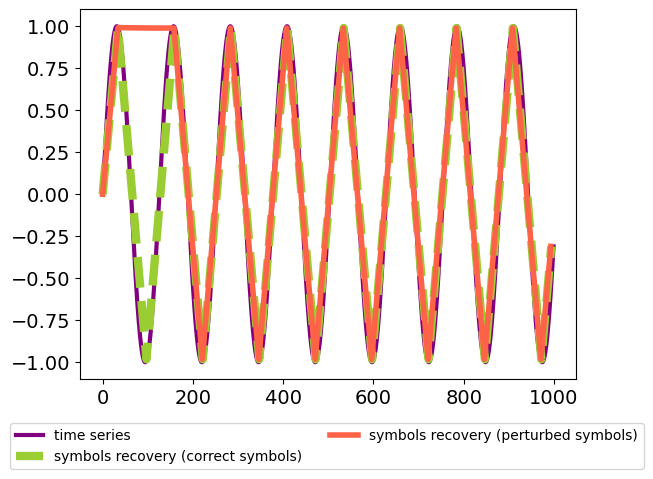

In [12]:
plt.plot(ts, label='time series', c='purple', linewidth=3)
plt.plot(xinv_ts1, label='symbols recovery (correct symbols)', c='yellowgreen', linewidth=6, linestyle='--')
plt.plot(xinv_ts2, label='symbols recovery (perturbed symbols)', c='tomato', linewidth=4, linestyle='-')
plt.legend(bbox_to_anchor=(1.15, -0.1), ncols=2)
plt.tick_params(axis='both', which='both', labelsize=14)
plt.savefig('save/ex2.pdf', bbox_inches='tight')
plt.show()

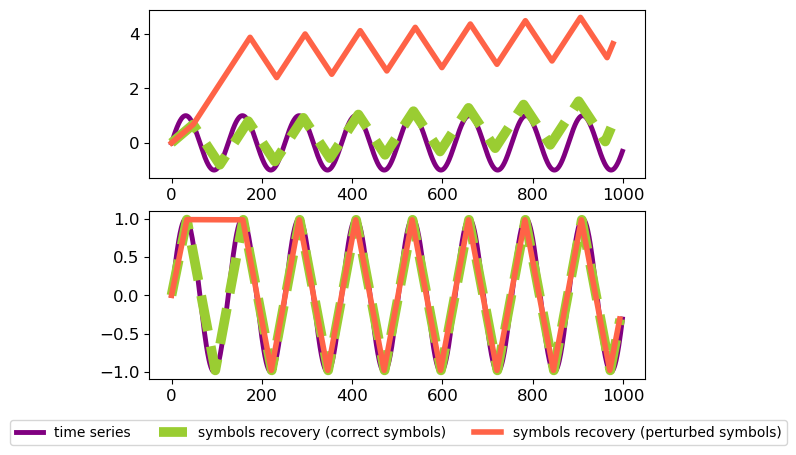

In [13]:
fig, axs = plt.subplots(2)

axs[0].plot(ts, label='time series', c='purple', linewidth=3.5)
axs[0].plot(inv_ts1, label='symbols recovery (correct symbols)', c='yellowgreen', linewidth=7, linestyle='--')
axs[0].plot(inv_ts2, label='symbols recovery (perturbed symbols)', c='tomato', linewidth=4, linestyle='-')
axs[0].tick_params(axis='both', which='both', labelsize=12)

axs[1].plot(ts, label='time series', c='purple', linewidth=3.5)
axs[1].plot(xinv_ts1, label='symbols recovery (correct symbols)', c='yellowgreen', linewidth=7, linestyle='--')
axs[1].plot(xinv_ts2, label='symbols recovery (perturbed symbols)', c='tomato', linewidth=4, linestyle='-')
axs[1].tick_params(axis='both', which='both', labelsize=12)

plt.legend(bbox_to_anchor=(1.3, -0.2), ncols=3)

plt.savefig('save/ex3.pdf', bbox_inches='tight')
plt.show()

### Multiple time series

In [14]:
train, test = loadData()

#### fit data

In [15]:
xab = XABBA(tol=0.1, alpha=0.1, verbose=1)
string = xab.fit_transform(train, n_jobs=40)

inv_ts = xab.inverse_transform(string)

Generate 312 symbols


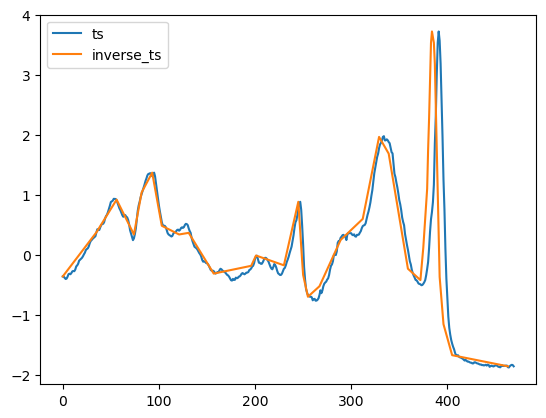

In [16]:
plt.plot(train[0], label='ts')
plt.plot(inv_ts[0], label='inverse_ts')
plt.legend()

#### for out of sample data

In [17]:
string, inits = xab.transform(test, n_jobs=40)
inv_ts = xab.inverse_transform(string)

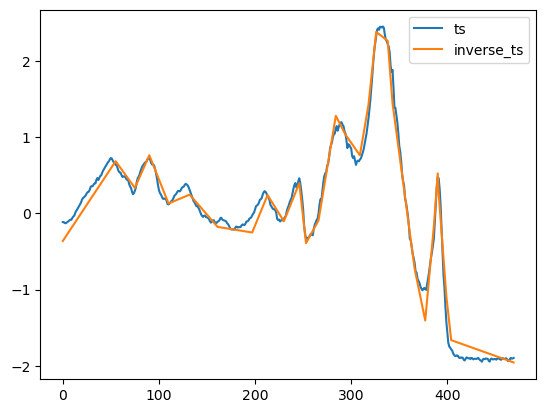

In [18]:
plt.plot(test[0], label='ts')
plt.plot(inv_ts[0], label='inverse_ts')
plt.legend()